图表已成功保存至: E:\code\Jupyter_study\股票画图\output\供销大集_价格范围图.png


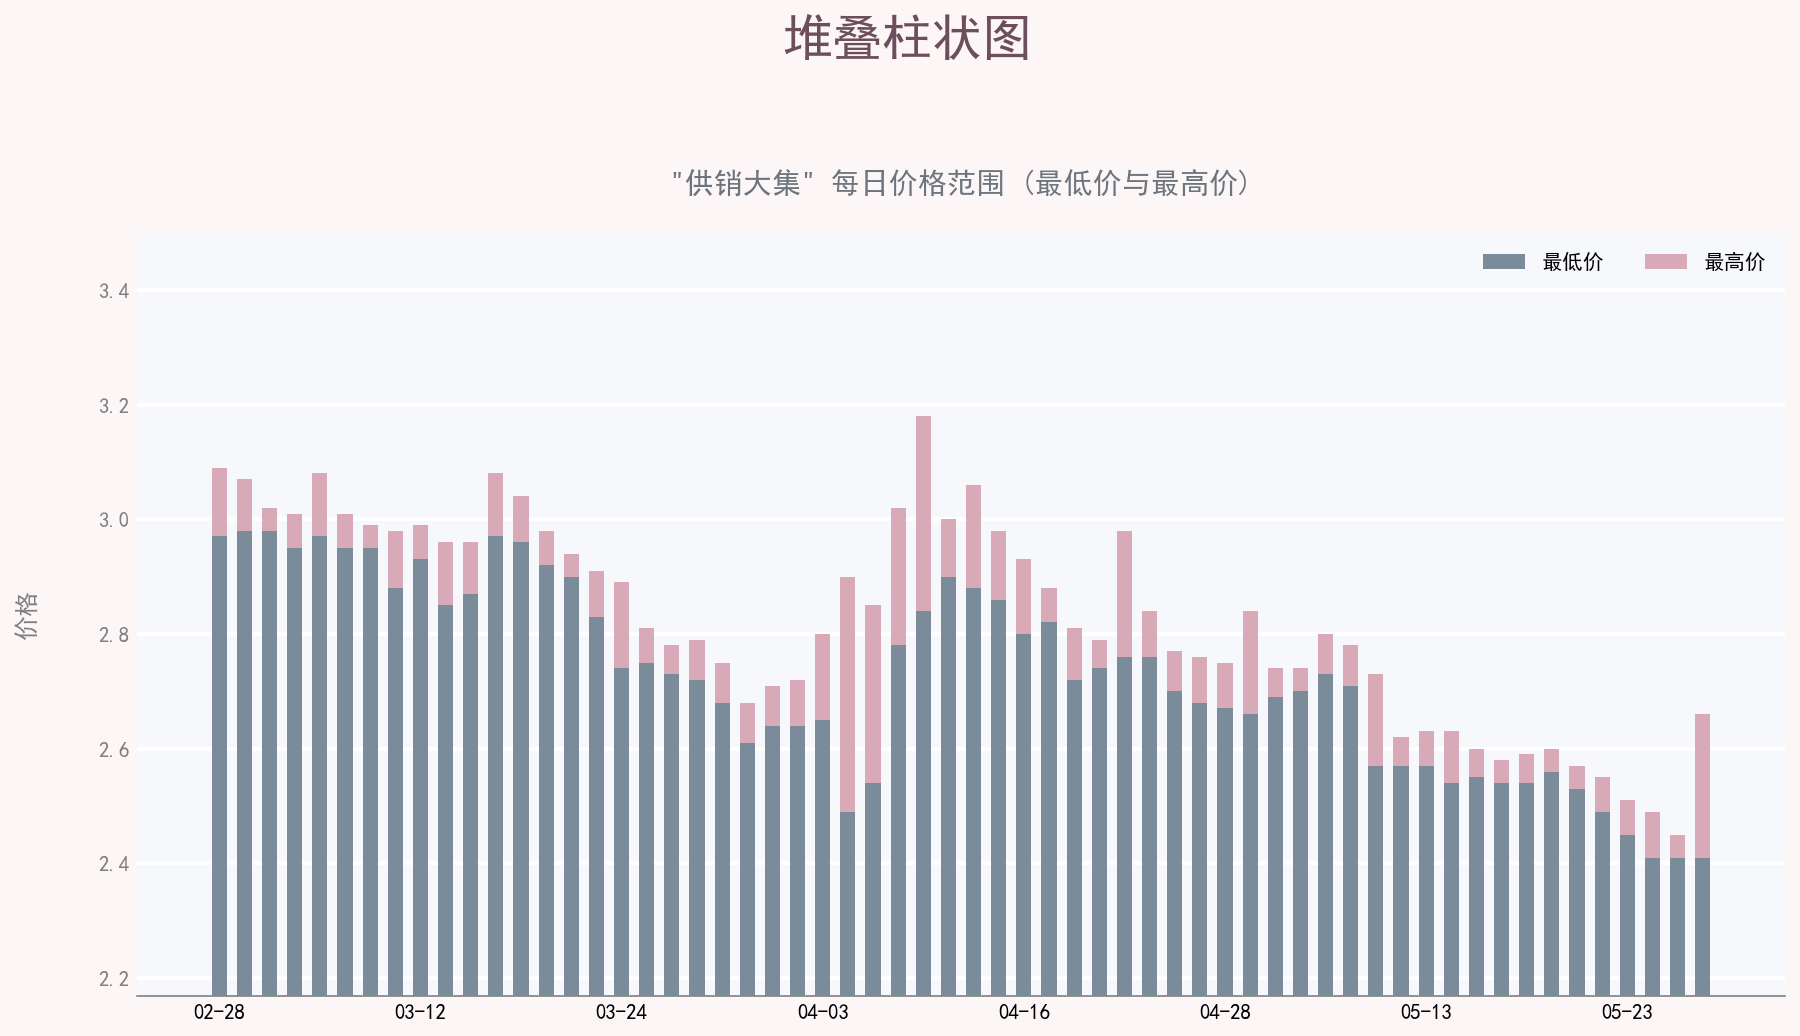

In [9]:
import pandas as pd_yxl
import matplotlib.pyplot as plt_yxl
import matplotlib.ticker as mticker_yxl
import numpy as np_yxl
import os as os_yxl  # 导入os模块，用于处理文件和目录

# --- 图表样式设置 ---
# 解决matplotlib中文显示问题
plt_yxl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt_yxl.rcParams['axes.unicode_minus'] = False    # 解决保存图像是负号'-'显示为方块的问题

def create_styled_stacked_bar_chart_yxl(excel_file_path_yxl, output_directory_yxl):
    """
    读取单个股票Excel文件，创建一个风格化堆叠柱状图，并保存为图片。
    
    Args:
        excel_file_path_yxl (str): 股票数据Excel文件的路径。
        output_directory_yxl (str): 保存生成图片的目录路径。
    """
    try:
        # --- 1. 读取和处理数据 ---
        df_yxl = pd_yxl.read_excel(excel_file_path_yxl)

        # 数据清洗
        df_yxl['交易时间'] = pd_yxl.to_datetime(df_yxl['交易时间'])
        # 确保价格列是数值类型
        for col_yxl in ['开盘价', '最高价', '最低价', '收盘价']:
            df_yxl[col_yxl] = pd_yxl.to_numeric(df_yxl[col_yxl], errors='coerce')
        df_yxl.dropna(subset=['交易时间', '最高价', '最低价'], inplace=True)
        df_yxl.sort_values(by='交易时间', inplace=True)
        
        if len(df_yxl) > 60: # 如果数据多于60天，只取最近60天
             df_yxl = df_yxl.tail(60).reset_index(drop=True)

        stock_name_yxl = df_yxl['证券名称'].iloc[0]

        # 计算堆叠的第二部分：价格范围
        df_yxl['价格范围'] = df_yxl['最高价'] - df_yxl['最低价']

    except FileNotFoundError:
        print(f"错误: 文件 '{excel_file_path_yxl}' 未找到。")
        return
    except Exception as e_yxl:
        print(f"处理文件时发生错误: {e_yxl}")
        return

    # --- 核心绘图逻辑 ---
    
    # 定义颜色
    fig_bg_color_yxl = '#FDF6F6'
    plot_bg_color_yxl = '#F7F8FC'
    title_color_yxl = '#6D4E5C'
    subtitle_color_yxl = '#6C757D'
    bar_color_low_yxl = '#7A8B99'
    bar_color_range_yxl = '#D8AAB7'
    
    # 创建图形和坐标轴
    fig_yxl, ax_yxl = plt_yxl.subplots(figsize=(12, 7), dpi=150) # 提高DPI使图像更清晰
    fig_yxl.patch.set_facecolor(fig_bg_color_yxl)
    ax_yxl.set_facecolor(plot_bg_color_yxl)

    # X轴为日期索引
    x_indices_yxl = np_yxl.arange(len(df_yxl))
    bar_width_yxl = 0.6

    # 绘制底层柱子 (最低价)
    ax_yxl.bar(x_indices_yxl, df_yxl['最低价'], width=bar_width_yxl,
           color=bar_color_low_yxl, label='最低价', zorder=3)

    # 绘制堆叠在上层的柱子 (价格范围)
    ax_yxl.bar(x_indices_yxl, df_yxl['价格范围'], width=bar_width_yxl, 
           bottom=df_yxl['最低价'], color=bar_color_range_yxl, 
           label='最高价', zorder=3)
           
    # ---图表美化 ---

    fig_yxl.suptitle('堆叠柱状图', fontsize=24, color=title_color_yxl, y=0.98, fontfamily='SimHei', weight='bold')
    ax_yxl.set_title(f'"{stock_name_yxl}" 每日价格范围 (最低价与最高价)', fontsize=14, color=subtitle_color_yxl, pad=20)
    ax_yxl.legend(loc='upper right', frameon=False, ncol=3, fontsize=10)
    ax_yxl.yaxis.grid(True, which='major', linestyle='-', color='white', linewidth=2, zorder=0)
    ax_yxl.set_axisbelow(True)
    ax_yxl.spines['top'].set_visible(False)
    ax_yxl.spines['right'].set_visible(False)
    ax_yxl.spines['left'].set_visible(False)
    ax_yxl.spines['bottom'].set_color('grey')
    ax_yxl.tick_params(axis='x', length=0)
    ax_yxl.tick_params(axis='y', length=0, colors='grey')
    
    # 动态设置Y轴范围，而不是写死
    y_min_yxl = df_yxl['最低价'].min() * 0.90  # 将下边距扩大到10%
    y_max_yxl = df_yxl['最高价'].max() * 1.10  # 将上边距扩大到10%

    ax_yxl.set_ylim(y_min_yxl, y_max_yxl)
    
    tick_spacing_yxl = max(1, len(df_yxl) // 7)
    tick_indices_yxl = x_indices_yxl[::tick_spacing_yxl]
    tick_labels_yxl = df_yxl['交易时间'].dt.strftime('%m-%d').iloc[::tick_spacing_yxl]
    ax_yxl.set_xticks(tick_indices_yxl)
    ax_yxl.set_xticklabels(tick_labels_yxl, rotation=0, fontsize=10)
    
    ax_yxl.set_ylabel('价格', fontsize=12, color='grey')
    ax_yxl.yaxis.set_label_coords(-0.06, 0.5)
    plt_yxl.tight_layout(rect=[0, 0, 1, 0.92])
    
    # --- 保存和显示图像 ---
    try:
        # 确保输出目录存在，如果不存在则创建
        if not os_yxl.path.exists(output_directory_yxl):
            os_yxl.makedirs(output_directory_yxl)
            print(f"已创建输出目录: {output_directory_yxl}")

        # 使用股票名称生成一个安全的文件名 (移除不适用作文件名的字符)
        safe_stock_name_yxl = "".join(c_yxl for c_yxl in stock_name_yxl if c_yxl.isalnum() or c_yxl in (' ', '_')).rstrip()
        output_filename_yxl = f"{safe_stock_name_yxl}_价格范围图.png"
        output_save_path_yxl = os_yxl.path.join(output_directory_yxl, output_filename_yxl)

        # 保存图表
        # dpi=300 保证高分辨率
        # bbox_inches='tight' 裁剪掉图表周围多余的空白
        # facecolor=fig.get_facecolor() 保证保存的图片背景色和显示的一致
        plt_yxl.savefig(output_save_path_yxl, dpi=300, bbox_inches='tight', facecolor=fig_yxl.get_facecolor())
        print(f"图表已成功保存至: {output_save_path_yxl}")

    except Exception as e_yxl:
        print(f"保存文件时发生错误: {e_yxl}")

    # 显示图像
    plt_yxl.show()


# --- 主程序入口 ---
if __name__ == "__main__":
    # 1. 指定Excel文件路径
    stock_file_path_yxl = r'E:\code\Jupyter_study\股票画图\股票date\3_供销大社.xls'
    
    # 2. 指定保存图片的输出目录
    output_dir_yxl = r'E:\code\Jupyter_study\股票画图\output'
    
    # 3. 调用函数生成并保存图表
    create_styled_stacked_bar_chart_yxl(stock_file_path_yxl, output_dir_yxl)